In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as m
import matplotlib.pyplot as plt
import seaborn as sn
import re

In [8]:
'''
Lettura dal file di testo 'log' dello storico delle mosse effettuate rispetto a quella rilevata dagli stimatori.
Mossa rilevata: stima moda, stima random, ...
'''
with open('log.txt', 'r') as file :
    log = file.read()
mosse = re.findall('Mossa effettuata: (.*)!', log)
mosse_giuste = np.array([])
mosse_giuste = np.append(mosse_giuste, mosse)

mosse = re.findall('Mossa rilevata: (.*)!', log)
mosse_rilevate_moda = np.array([])
mosse_rilevate_random = np.array([])
mosse_rilevate_carta = np.array([])
mosse_rilevate_moda_pesata = np.array([])
for rilevamento in mosse :
    stimatori = rilevamento.split(', ')
    mosse_rilevate_moda = np.append(mosse_rilevate_moda, stimatori[0])
    mosse_rilevate_random = np.append(mosse_rilevate_random, stimatori[1])
    mosse_rilevate_carta = np.append(mosse_rilevate_carta, stimatori[2])
    mosse_rilevate_moda_pesata = np.append(mosse_rilevate_moda_pesata, stimatori[3])
#print(mosse_rilevate_moda, " vs ", mosse_giuste)

In [9]:
'''
Funzione che, date 3 liste di mosse per argomento, restituisce un dataframe contenente sensibilità e specificità per ogni mossa.
mosse_giuste --> lista contenente le mosse considerate corrette
mosse_predette --> lista contenente le mosse rilevate dai sensori
mosse --> lista contenente l'insieme delle mosse possibili
'''
def print_stats(mosse_giuste, mosse_predette, mosse) :
    all_matrix = m.multilabel_confusion_matrix(mosse_predette, mosse_giuste, labels=mosse) # lista contenente le n matrici
    i=0
    stats = pd.DataFrame(index=["Sensibilità", "Specificità"], columns=[mosse[0], mosse[1], mosse[2]]) # dataframe restituito con valori di sensibilità e specificità
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[15,5])
    ax = [ax1, ax2, ax3]
    fig.subplots_adjust(wspace=0.01)
    for matrix in all_matrix :
        matrix[1][1], matrix[0][0] = matrix[0][0], matrix[1][1]
        matrix[0][1], matrix[1][0] = matrix[1][0], matrix[0][1]

        df_matrix = pd.DataFrame(matrix, [mosse[i], "altro"], [mosse[i], "altro"])
        ax[i].set_title(mosse[i], weight='bold')
        plt.rcParams["figure.autolayout"] = True
        
        map = sn.heatmap(df_matrix, annot=True, annot_kws={"size": 10}, ax=ax[i], cbar=True) # creazione della mappa di calore
        sn.set(font_scale=1) # for label size
        map.set(ylabel="Mossa rilevata", xlabel="Mossa effettuata")
        map.xaxis.tick_top()

        # Calcoli statistici:
        TP = matrix[0].sum() # Totali Positivi
        VP = matrix[0][0] # Veri Positivi
        TN = matrix[1].sum() # Totali Negativi
        VN = matrix[1][1] # Veri Negativi
        if TP==0 :
            sensibilita = 0
        else :
            sensibilita = VP / TP
        if TN==0 :
            specificita=0
        else :
            specificita = VN / TN

        stats[mosse[i]][0] = sensibilita
        stats[mosse[i]][1] = specificita
        i+=1
    fig.subplots_adjust(wspace=0.05)
    plt.show()
    return stats

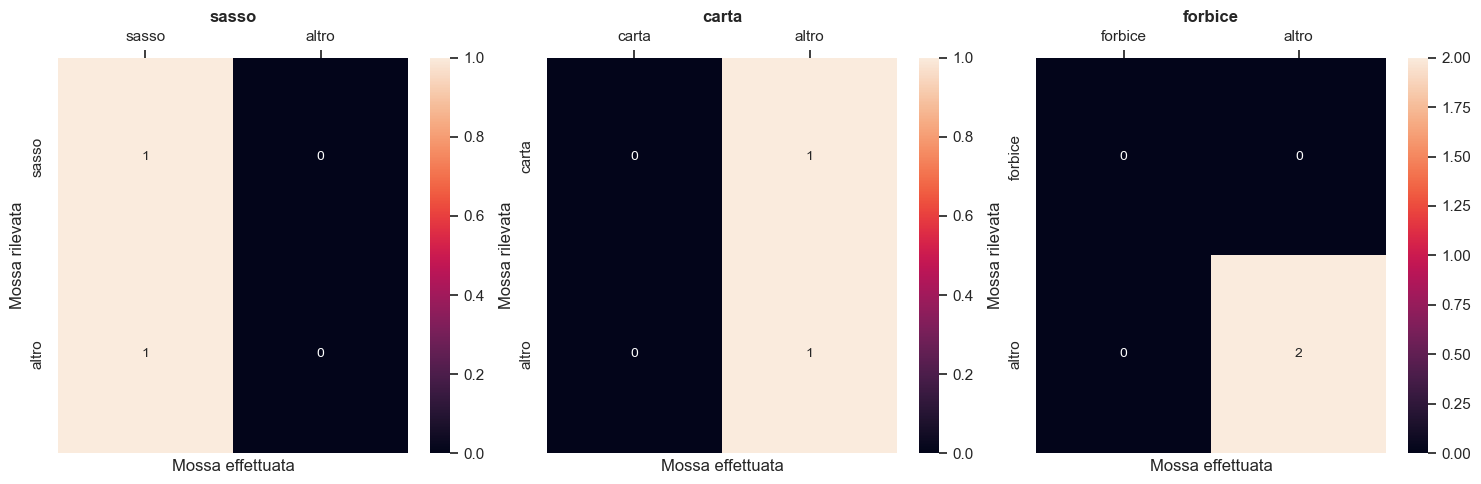

,sasso,carta,forbice
Sensibilità,1.0,0.0,0
Specificità,0.0,1.0,1.0


In [10]:
mosse = ["sasso", "carta", "forbice"]
print_stats(mosse_giuste, mosse_rilevate_moda, mosse)

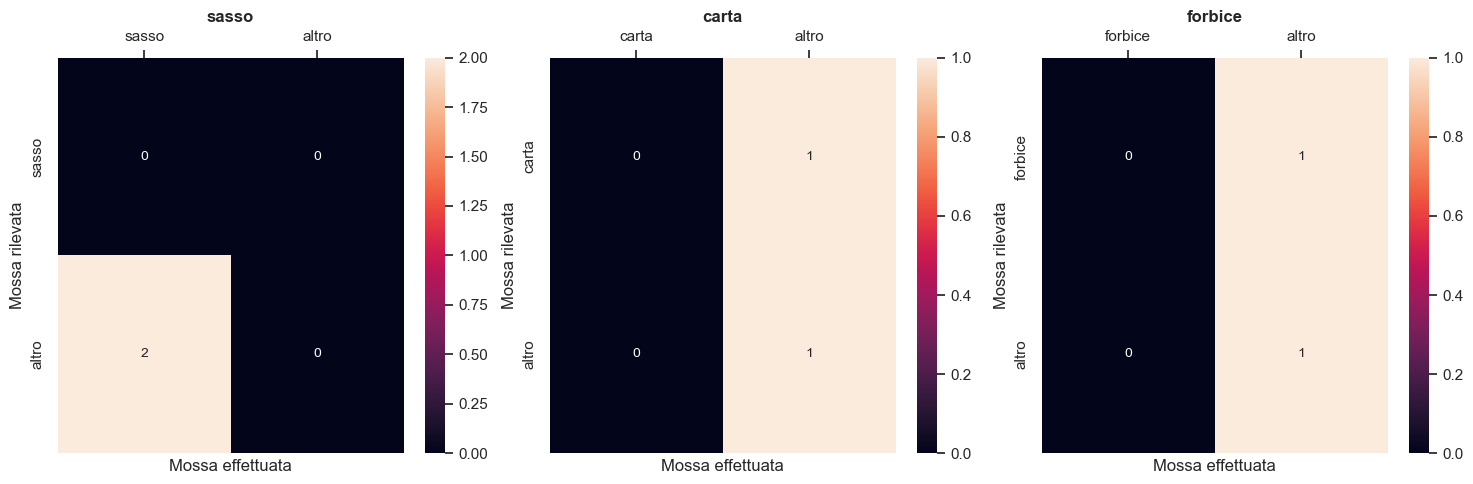

,sasso,carta,forbice
Sensibilità,0,0.0,0.0
Specificità,0.0,1.0,1.0


In [11]:
print_stats(mosse_giuste, mosse_rilevate_random, mosse)

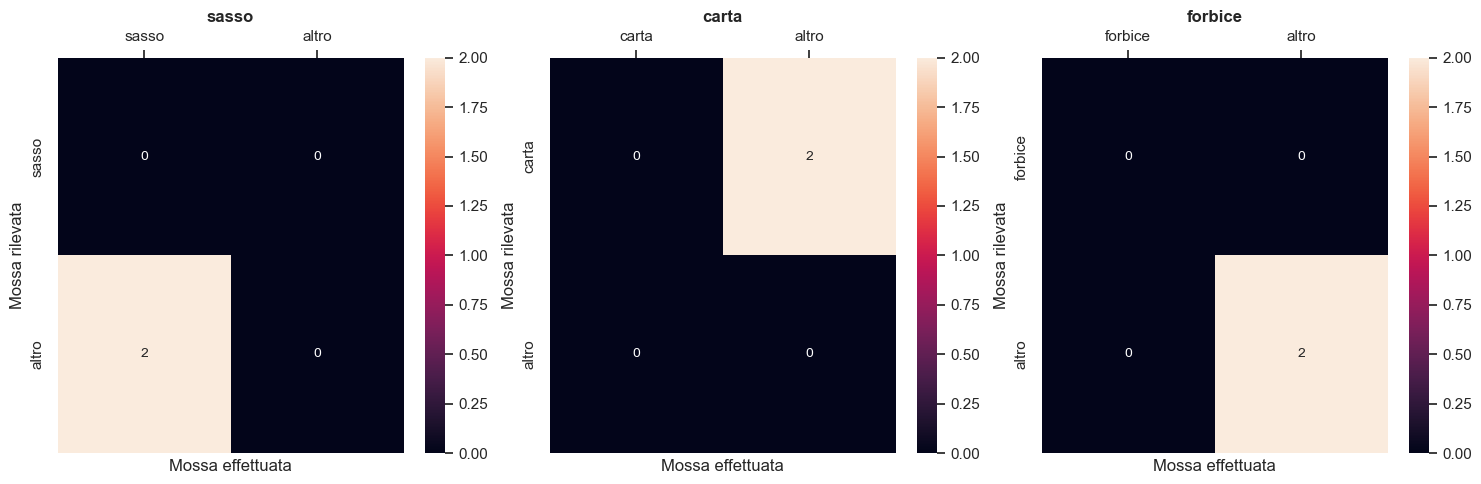

,sasso,carta,forbice
Sensibilità,0,0.0,0
Specificità,0.0,0,1.0


In [12]:
print_stats(mosse_giuste, mosse_rilevate_carta, mosse)

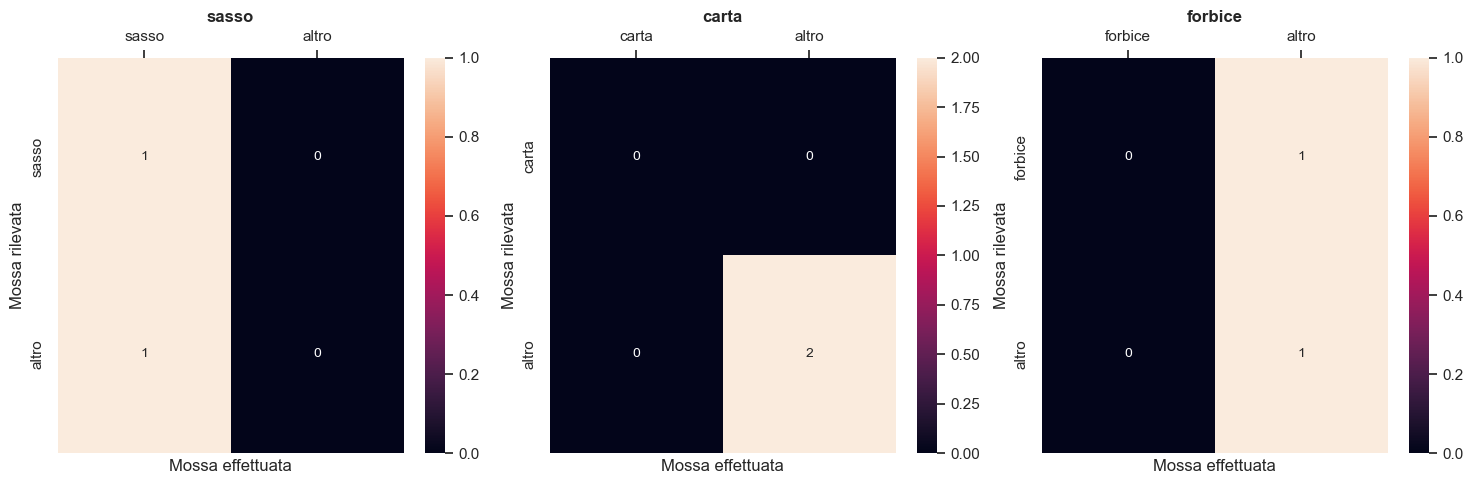

,sasso,carta,forbice
Sensibilità,1.0,0,0.0
Specificità,0.0,1.0,1.0


In [13]:
print_stats(mosse_giuste, mosse_rilevate_moda_pesata, mosse)